<a href="https://colab.research.google.com/github/benard3360-star/new/blob/main/Transactions_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Projects/workings.csv")
df.head()

,BENE ACCOUNT,BENE NAMES,REMITTER,MESSAGE TYPE,SENDER BIC CODE,SENDERS REF,VALUE DATE,CURR,AMOUNT
0,88nb4448551258,AHMED ALI ABDI\r\nNAIROBI\r\nNAIROBI KE,SAFARI INTERNATIONAL GROCERY STORE\r\nLLC\r\n1...,103,CHASUS33XXX,3572954145ES,24-May-24,USD,"3,500.00"
1,8.89E+13,OLOLO LIMITED\r\nSOUTH OF NAIROBI NATIONAL PAR...,"THE WILD SOURCE, LLC 801 14TH\r\nSTREET GOLDEN...",103,BKTRUS33XXX,C332289OCP852424,24-May-24,USD,646
2,883884789512nb,BHALLA POOJA JUGAL KISHORE,INTERNATIONAL ORGANIZATION FOR\r\nMIGRATION-PA...,104,SCBLUS33XXX,2.82E+15,24-May-24,USD,"5,741.79"
3,8.89E+13,KITICH CAMP LIMITED (USD)\r\nIM BANK KENYA 302...,OLIVER MARKHAM 53 RODWELL ROAD LOND\r\nON SE22...,103,CHASUS33XXX,8616388145JO,24-May-24,USD,616
4,8198nb53131211,TWIGA CAR HIRE TOURS LTD,COLLECTIVE RISING LEADERSHIP\r\n1015 2939 VAN ...,103,CITIUS33XXX,G8141454423381,24-May-24,USD,"8,304.00"


## Cleaning the Dataset

In [24]:
# Display column names and data types
print(df.dtypes)

BENE ACCOUNT               object
BENE NAMES                 object
REMITTER                   object
MESSAGE TYPE                int64
SENDER BIC CODE            object
SENDERS REF                object
VALUE DATE         datetime64[ns]
CURR                       object
AMOUNT                    float64
dtype: object


In [11]:
print('Column names:')
print(df.columns)

# Find unique message types
print('\
Unique message types:')
print(df['MESSAGE TYPE'].unique())

# Display the count of each message type
print('\
Count of each message type:')
print(df['MESSAGE TYPE'].value_counts())

Column names:
Index(['BENE ACCOUNT ', 'BENE NAMES', 'REMITTER', 'MESSAGE TYPE',
       'SENDER BIC CODE', 'SENDERS REF ', 'VALUE DATE', 'CURR', 'AMOUNT '],
      dtype='object')
Unique message types:
[103 104   1]
Count of each message type:
MESSAGE TYPE
103    4781
104       2
1         1
Name: count, dtype: int64


In [15]:

# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

# Clean the 'AMOUNT' column
df['AMOUNT'] = df['AMOUNT'].str.replace(',', '').astype(float)

Updated data types:
BENE ACCOUNT               object
BENE NAMES                 object
REMITTER                   object
MESSAGE TYPE                int64
SENDER BIC CODE            object
SENDERS REF                object
VALUE DATE         datetime64[ns]
CURR                       object
AMOUNT                    float64
dtype: object
Summary statistics:
       MESSAGE TYPE                     VALUE DATE        AMOUNT
count   4784.000000                           4783  4.783000e+03
mean     102.979097  2024-05-18 20:08:28.802007040  8.232133e+05
min        1.000000            2024-05-10 00:00:00  1.000000e+00
25%      103.000000            2024-05-15 00:00:00  1.186325e+03
50%      103.000000            2024-05-20 00:00:00  4.474000e+03
75%      103.000000            2024-05-22 00:00:00  1.996557e+04
max      104.000000            2024-05-29 00:00:00  3.118810e+08
std        1.474851                            NaN  8.936609e+06
First few rows of cleaned dataframe:
     BENE ACCOUNT 

In [16]:
# Show summary statistics
print('\
Summary statistics:')
print(df.describe())


Summary statistics:
       MESSAGE TYPE                     VALUE DATE        AMOUNT
count   4784.000000                           4783  4.783000e+03
mean     102.979097  2024-05-18 20:08:28.802007040  8.232133e+05
min        1.000000            2024-05-10 00:00:00  1.000000e+00
25%      103.000000            2024-05-15 00:00:00  1.186325e+03
50%      103.000000            2024-05-20 00:00:00  4.474000e+03
75%      103.000000            2024-05-22 00:00:00  1.996557e+04
max      104.000000            2024-05-29 00:00:00  3.118810e+08
std        1.474851                            NaN  8.936609e+06


In [17]:
# Display the updated data types
print('Updated data types:')
print(df.dtypes)


Updated data types:
BENE ACCOUNT               object
BENE NAMES                 object
REMITTER                   object
MESSAGE TYPE                int64
SENDER BIC CODE            object
SENDERS REF                object
VALUE DATE         datetime64[ns]
CURR                       object
AMOUNT                    float64
dtype: object


In [18]:
# Display the first few rows of the cleaned dataframe
print('\
First few rows of cleaned dataframe:')
print(df.head())

First few rows of cleaned dataframe:
     BENE ACCOUNT                                         BENE NAMES  \
0  88nb4448551258            AHMED ALI ABDI\r\nNAIROBI\r\nNAIROBI KE   
1        8.89E+13  OLOLO LIMITED\r\nSOUTH OF NAIROBI NATIONAL PAR...   
2  883884789512nb                         BHALLA POOJA JUGAL KISHORE   
3        8.89E+13  KITICH CAMP LIMITED (USD)\r\nIM BANK KENYA 302...   
4  8198nb53131211                         TWIGA CAR HIRE   TOURS LTD   

                                            REMITTER  MESSAGE TYPE  \
0  SAFARI INTERNATIONAL GROCERY STORE\r\nLLC\r\n1...           103   
1  THE WILD SOURCE, LLC 801 14TH\r\nSTREET GOLDEN...           103   
2  INTERNATIONAL ORGANIZATION FOR\r\nMIGRATION-PA...           104   
3  OLIVER MARKHAM 53 RODWELL ROAD LOND\r\nON SE22...           103   
4  COLLECTIVE RISING LEADERSHIP\r\n1015 2939 VAN ...           103   

  SENDER BIC CODE       SENDERS REF VALUE DATE CURR   AMOUNT  
0     CHASUS33XXX      3572954145ES 2024-05-24

In [19]:
# Calculate average amount
avg_amount = df['AMOUNT'].mean()
print(f'Average amount: ${avg_amount:,.2f}')

Average amount: $823,213.30


In [20]:
# Count unique beneficiaries
unique_beneficiaries = df['BENE NAMES'].nunique()
print(f'Number of unique beneficiaries: {unique_beneficiaries}')

Number of unique beneficiaries: 4038


In [21]:
# Most common currency
most_common_currency = df['CURR'].mode().values[0]
print(f'Most common currency: {most_common_currency}')


Most common currency: USD


In [25]:
# Display the first few rows of the dataframe
print(df.head())

# Convert 'VALUE DATE' to datetime
df['VALUE DATE'] = pd.to_datetime(df['VALUE DATE'], format='%d-%b-%y')


     BENE ACCOUNT                                         BENE NAMES  \
0  88nb4448551258            AHMED ALI ABDI\r\nNAIROBI\r\nNAIROBI KE   
1        8.89E+13  OLOLO LIMITED\r\nSOUTH OF NAIROBI NATIONAL PAR...   
2  883884789512nb                         BHALLA POOJA JUGAL KISHORE   
3        8.89E+13  KITICH CAMP LIMITED (USD)\r\nIM BANK KENYA 302...   
4  8198nb53131211                         TWIGA CAR HIRE   TOURS LTD   

                                            REMITTER  MESSAGE TYPE  \
0  SAFARI INTERNATIONAL GROCERY STORE\r\nLLC\r\n1...           103   
1  THE WILD SOURCE, LLC 801 14TH\r\nSTREET GOLDEN...           103   
2  INTERNATIONAL ORGANIZATION FOR\r\nMIGRATION-PA...           104   
3  OLIVER MARKHAM 53 RODWELL ROAD LOND\r\nON SE22...           103   
4  COLLECTIVE RISING LEADERSHIP\r\n1015 2939 VAN ...           103   

  SENDER BIC CODE       SENDERS REF VALUE DATE CURR   AMOUNT  
0     CHASUS33XXX      3572954145ES 2024-05-24  USD  3500.00  
1     BKTRUS33XXX  C

In [37]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded and cleaned from the previous step
# Group by currency and calculate sum and count
currency_breakdown = df.groupby('CURR').agg({
    'AMOUNT': ['sum', 'count', 'mean']
}).reset_index()

# Rename columns for clarity
currency_breakdown.columns = ['Currency', 'Total Amount', 'Transaction Count', 'Average Amount']

# Sort by Total Amount in descending order
currency_breakdown = currency_breakdown.sort_values('Total Amount', ascending=False)

# Calculate percentage of total amount
total_amount = currency_breakdown['Total Amount'].sum()
currency_breakdown['Percentage'] = (currency_breakdown['Total Amount'] / total_amount) * 100

# Format the columns
currency_breakdown['Total Amount'] = currency_breakdown['Total Amount'].apply(lambda x: f'${x:,.2f}')
currency_breakdown['Average Amount'] = currency_breakdown['Average Amount'].apply(lambda x: f'${x:,.2f}')
currency_breakdown['Percentage'] = currency_breakdown['Percentage'].apply(lambda x: f'{x:.2f}%')

# Display the breakdown
print(currency_breakdown.to_string(index=False))

print('done')


Currency      Total Amount  Transaction Count Average Amount Percentage
     KES $3,849,442,620.24                537  $7,168,422.01     97.77%
     USD    $71,155,096.97               3551     $20,038.04      1.81%
     EUR     $7,186,094.44                466     $15,420.80      0.18%
     GBP     $5,003,381.88                172     $29,089.43      0.13%
     ZAR     $3,835,250.48                 24    $159,802.10      0.10%
     JPY       $430,389.00                  1    $430,389.00      0.01%
     AUD       $159,898.00                 11     $14,536.18      0.00%
     CHF       $102,496.04                 12      $8,541.34      0.00%
     AED        $85,006.53                  5     $17,001.31      0.00%
     CAD        $29,000.00                  4      $7,250.00      0.00%
done


### *Creating a histogram to show the transactions per currency*

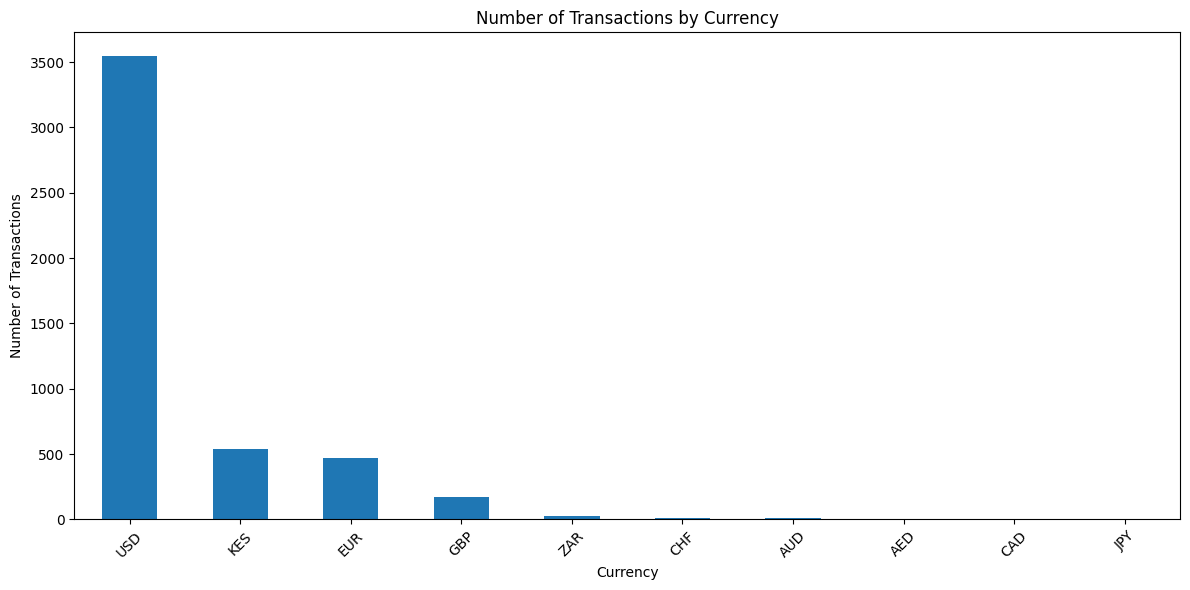

In [36]:
# Create a bar plot of transaction counts by currency
plt.figure(figsize=(12, 6))
currency_counts = df['CURR'].value_counts()
currency_counts.plot(kind='bar')
plt.title('Number of Transactions by Currency')
plt.xlabel('Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### *Creating* a piechart *italicized text*

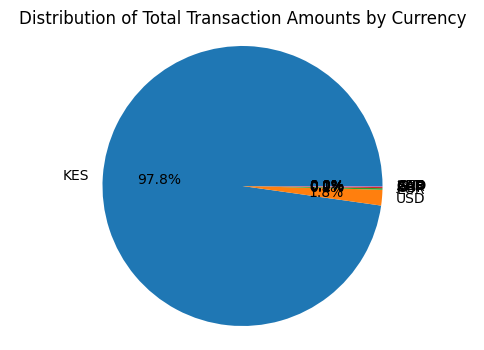

In [39]:
# Create a pie chart of total amounts by currency
plt.figure(figsize=(6, 4))
plt.pie(currency_breakdown['Total Amount'].str.replace('[\$,]', '', regex=True).astype(float),
        labels=currency_breakdown['Currency'], autopct='%1.1f%%')
plt.title('Distribution of Total Transaction Amounts by Currency')
plt.axis('equal')
plt.show()


### Creating Pots to better understand the transactons

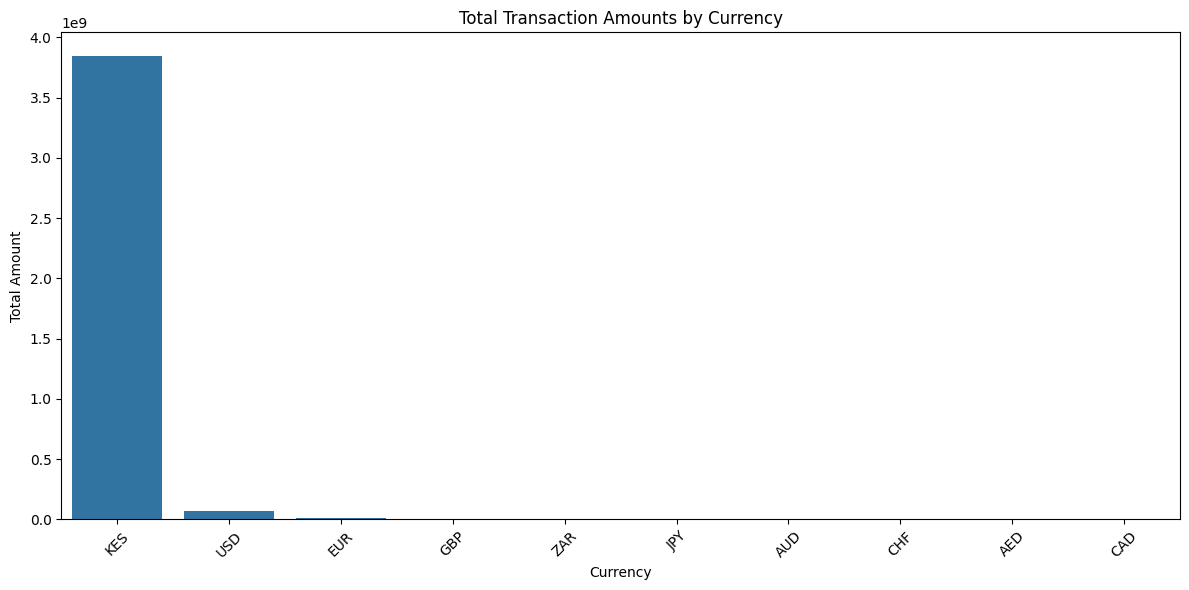

This bar plot shows the total transaction amounts by currency.
As we observed in the table earlier, KES (Kenyan Shilling) dominates
the transactions with the highest total amount, followed by USD (US Dollar)
The other currencies have significantly smaller total amounts in comparison.


In [33]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
# Group by currency and calculate sum and count
currency_breakdown = df.groupby('CURR').agg({
    'AMOUNT': ['sum', 'count']
}).reset_index()

# Rename columns for clarity
currency_breakdown.columns = ['Currency', 'Total Amount', 'Transaction Count']

# Sort by Total Amount in descending order
currency_breakdown = currency_breakdown.sort_values('Total Amount', ascending=False)

# Create a bar plot of total amounts by currency
plt.figure(figsize=(12, 6))
sns.barplot(x='Currency', y='Total Amount', data=currency_breakdown)
plt.title('Total Transaction Amounts by Currency')
plt.xlabel('Currency')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("This bar plot shows the total transaction amounts by currency.")
print("As we observed in the table earlier, KES (Kenyan Shilling) dominates")
print("the transactions with the highest total amount, followed by USD (US Dollar)")
print("The other currencies have significantly smaller total amounts in comparison.")


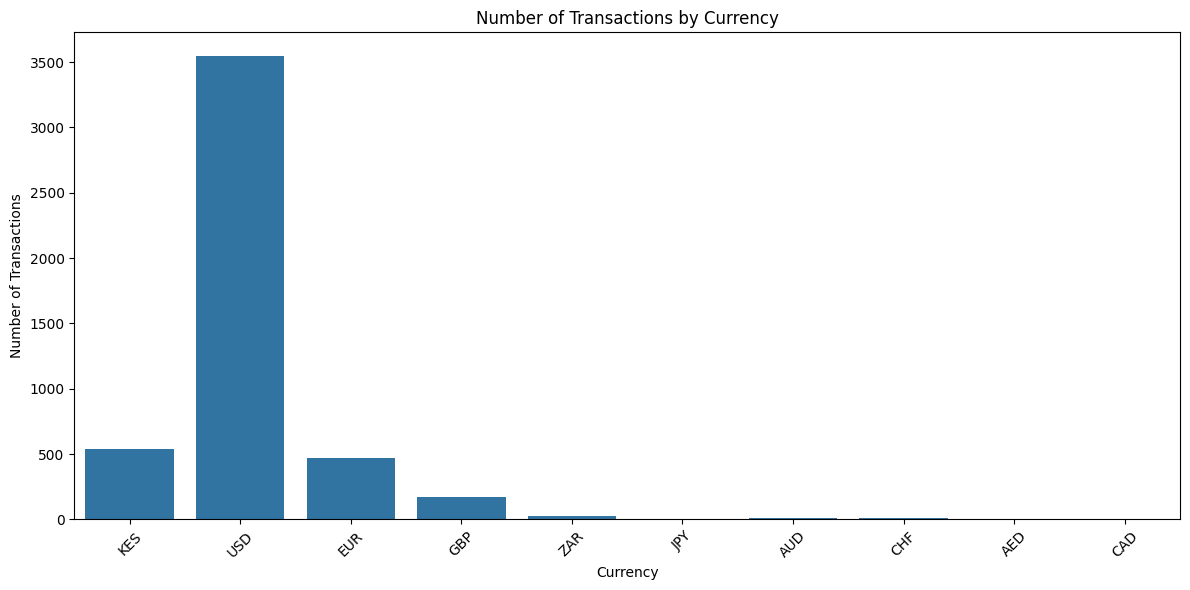

This second bar plot displays the number of transactions by currency.
Interestingly, we can see that USD has the highest number of transactions,
followed by KES.
This confirms our earlier observation that while KES has the highest total amount,
USD has more frequent but smaller transactions.


In [32]:
# Create a bar plot of transaction counts by currency
plt.figure(figsize=(12, 6))
sns.barplot(x='Currency', y='Transaction Count', data=currency_breakdown)
plt.title('Number of Transactions by Currency')
plt.xlabel('Currency')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("This second bar plot displays the number of transactions by currency.")
print("Interestingly, we can see that USD has the highest number of transactions,")
print("followed by KES.")
print("This confirms our earlier observation that while KES has the highest total amount,")
print("USD has more frequent but smaller transactions.")